In [1]:
import os
import matplotlib.pyplot as plt
% matplotlib inline
import json, codecs
import numpy as np

In [3]:
os.chdir(os.getcwd()+'/data')

None


In [7]:
vpns = ['bangalore', 'buenos-aries', 'london', 'milan', 'sao-paulo', 'sydney', 'tokyo', 'toronto']
times = ['00-hour', '02-hour', '04-hour', '24-hour']
torrents = ['Gotham.S03E05.720p.HDTV.X264-DIMENSION', 'Gotham.S03E05.HDTV.x264-LOL', 'Gotham.S03E05.XviD-AFG']

In [12]:
def plot_time_data(directory, locations, torrents):
    colors = ['blue', 'red', 'green', 'orange']
    for location in locations:
        total_torrents = {}
        for torrent in torrents:
            time_stamps = []
            completed = []
            incomplete = []
            peers_total = []
            connected_peers_total = []
            for folder in os.walk(directory):
                    if location in folder[0]:
                        files = folder[2]
                        for fname in files: 
                            if torrent in fname and '.json' in fname:
                                with open (folder[0]+'/'+fname, encoding = "ISO-8859-1") as f_in:
#                                     print( 'working on ', fname)
                                    fixedjson = f_in.read()
                                    if fixedjson[-1] != '}': fixedjson = fixedjson + '}'
                                    data = json.loads(fixedjson)
                                    time_stamps.append(data['date time'])
                                    completed.append(data['completed'])
                                    incomplete.append(data['incomplete'])
                                    peers_total.append(data['peers total'])
                                    connected_peers_total.append(data['connected peers total']) 
            total_torrents[torrent] = [time_stamps, completed, incomplete, peers_total, connected_peers_total]

        fig = plt.figure()
        xlabels = ['0th hour', '2nd hour', '4th hour', '24th hour']
        styles = ['-', '--', ':']
        ax = fig.add_subplot(1,1,1)
        artists = []
        for c in colors:
            artists.append(plt.Line2D((0,1),(0,0), color=c))
        i = 0 
        hours = 0
        for torrentname, val in total_torrents.items():
            x = np.arange(len(val[0]))
            hours = len(val[0])
            ax.plot(x, val[1], color=colors[0], linestyle = styles[i], label = "Completed")
            ax.plot(x, val[2], color=colors[1], linestyle = styles[i], label = "Incomplete")
            ax.plot(x, val[3], color=colors[2], linestyle = styles[i], label = "Peers Total")
            ax.plot(x, val[4], color=colors[3], linestyle = styles[i], label = "Connected Peers Total")
            artists.append(plt.Line2D((0,1),(0,0), color='k', linestyle=styles[i]))
            i += 1
        
        ax.legend([a for a in artists], ["Completed", "Incomplete", "Peers Total", "Connected Peers"]+[name for name in total_torrents.keys()],
                  bbox_to_anchor=(1.7, 1), loc='upper right', prop = {'size': 8})
        plt.xticks(x, xlabels)
        plt.title("First " + ''.join(c for c in xlabels[hours-1] if c.isdigit()) +" hours of Gotham in " + location, fontdict = {'fontsize': 10})
        plt.show()

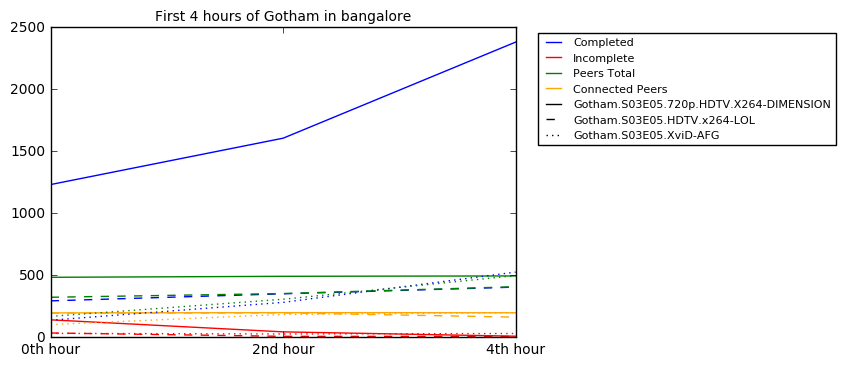

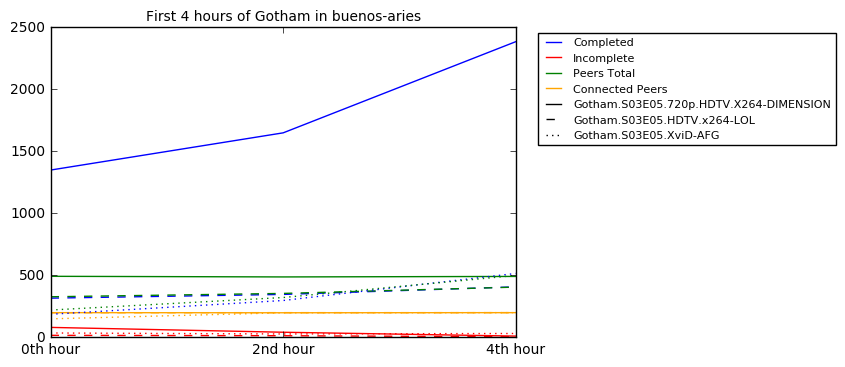

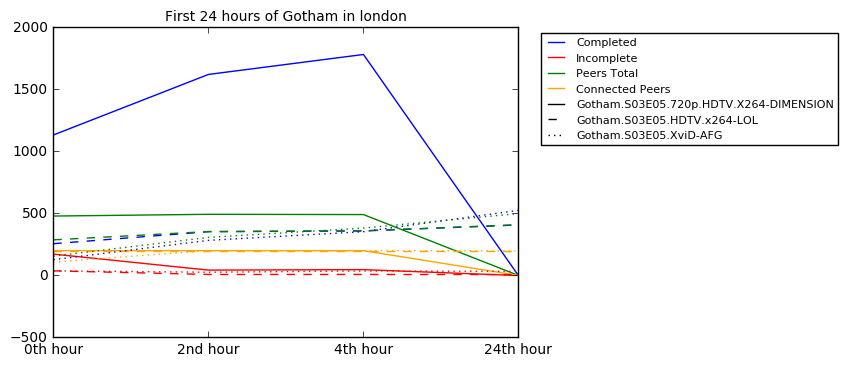

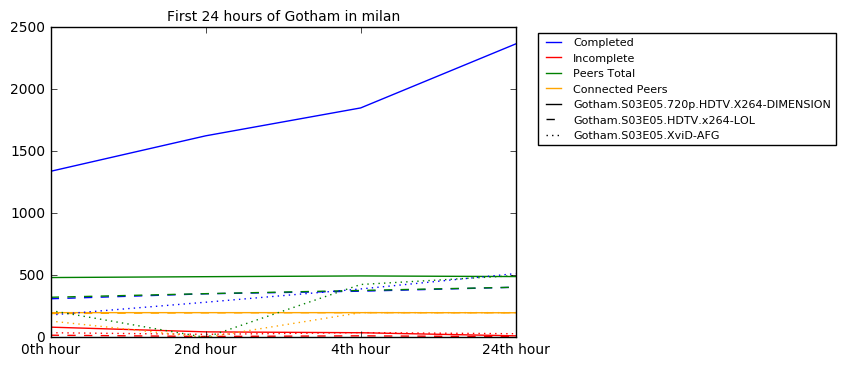

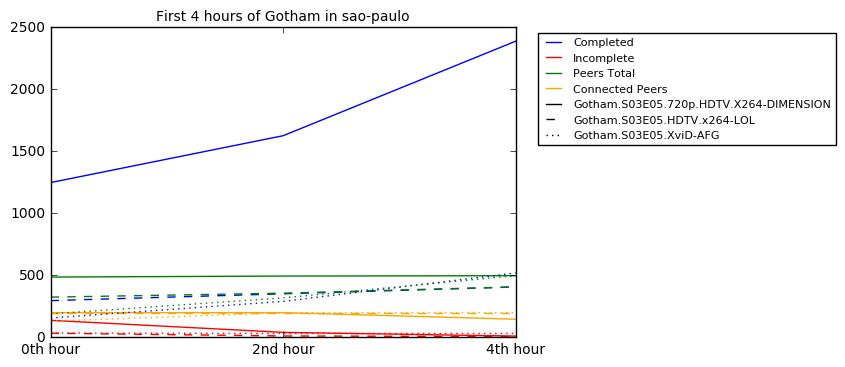

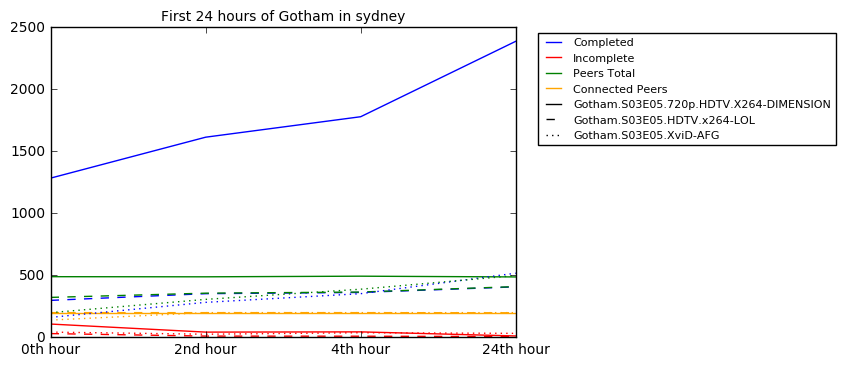

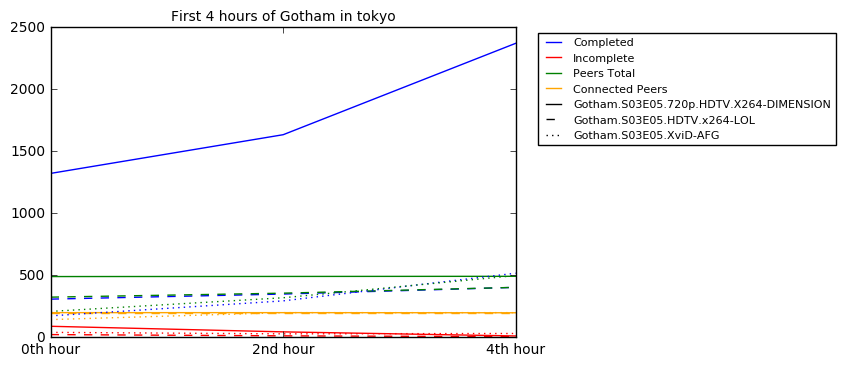

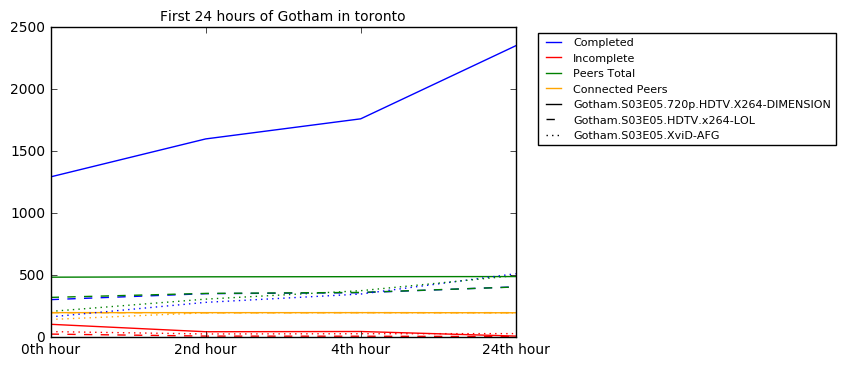

In [13]:
plot_time_data(os.getcwd(), vpns, torrents)

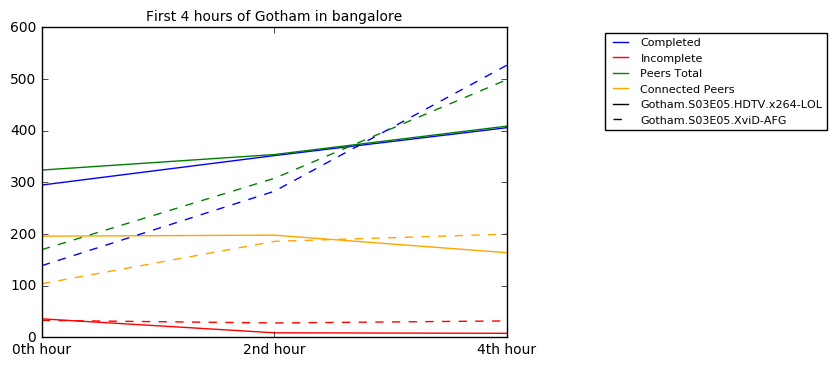

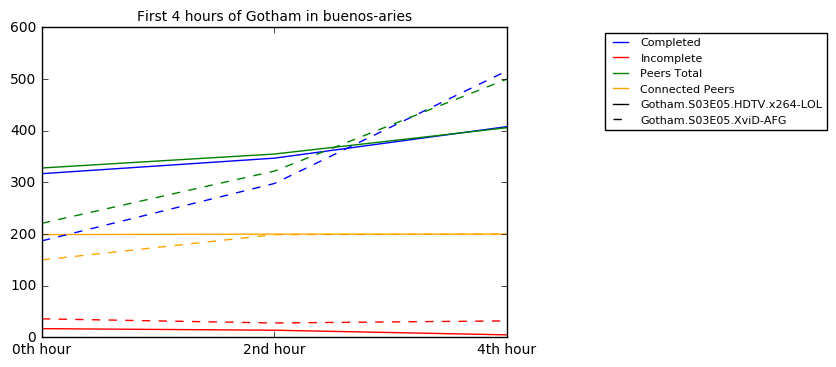

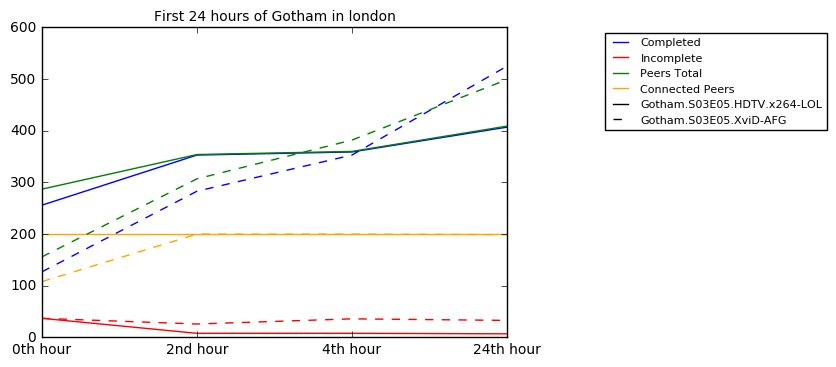

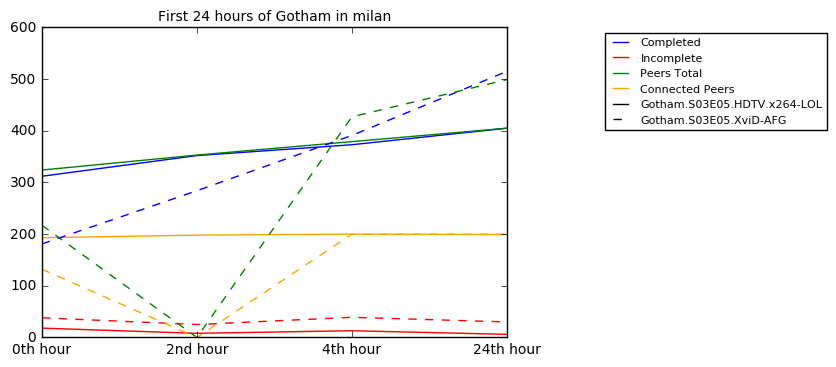

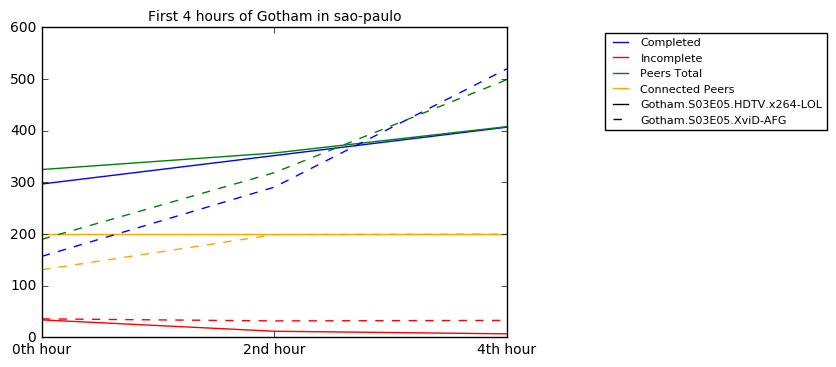

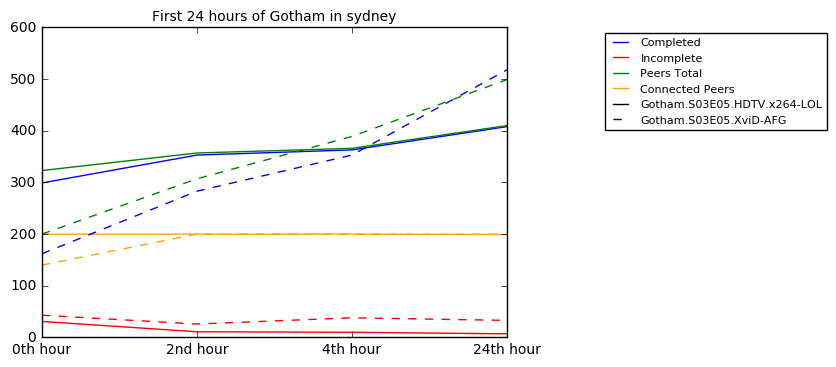

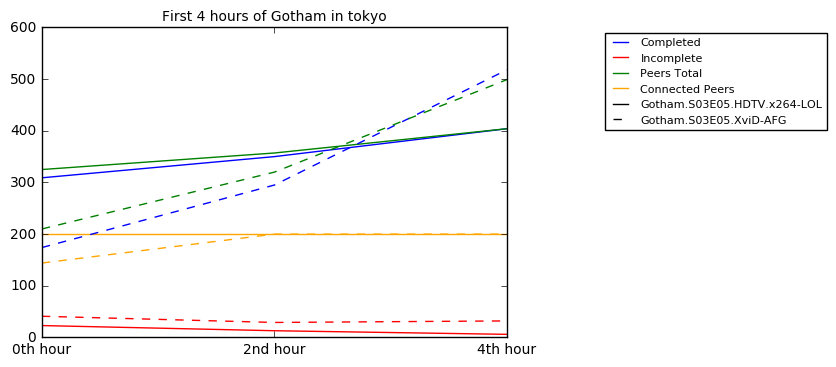

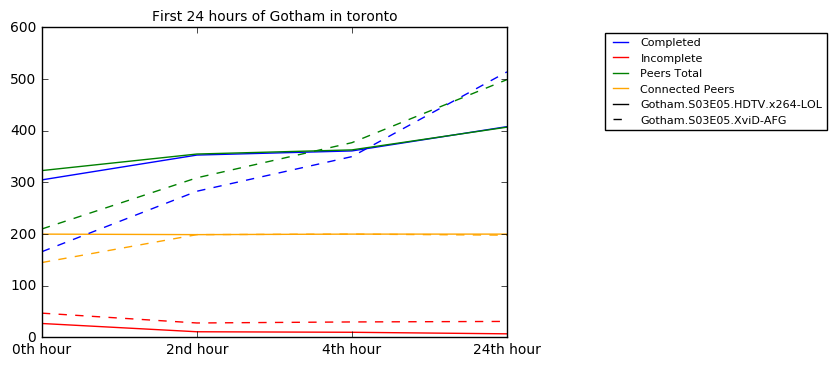

In [14]:
no_dim = ['Gotham.S03E05.HDTV.x264-LOL', 'Gotham.S03E05.XviD-AFG']
plot_time_data(os.getcwd(), vpns, no_dim)